## Effect of batch size notebook

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import json
from copy import deepcopy
import random
import sys
import time
from typing import List
from pprint import PrettyPrinter
pp = PrettyPrinter(indent=4)

# get an absolute path to the directory that contains parent files
__file__ = globals()['_dh'][0]
project_dir = __file__ = globals()['_dh'][0]
sys.path.append(os.path.normpath(os.path.join(
    project_dir, '..', '..', '..')))

from experiments.utils.constants import (
    PIPLINES_PATH,
    NODE_PROFILING_CONFIGS_PATH,
    NODE_PROFILING_RESULTS_STATIC_PATH
)
from experiments.utils.loader import Loader

In [2]:
series = 5
experiment_id = 2
config_key_mapper = "key_config_mapper.csv"

series_path = os.path.join(
    NODE_PROFILING_RESULTS_STATIC_PATH,
    'series',
    str(series))
loader = Loader(
    series_path=series_path, config_key_mapper=config_key_mapper, second_node=True)
results = loader.result_processing()
key_config_df = loader.key_config_mapper()
print(results.columns)
print(key_config_df.columns)
results

Index(['experiment_id', 'client_to_server_latencies_avg',
       'client_to_server_latencies_p99', 'client_to_server_latencies_p50',
       'client_to_server_latencies_var', 'client_to_server_latencies_max',
       'client_to_server_latencies_min', 'model_latencies_avg',
       'model_latencies_p99', 'model_latencies_p50', 'model_latencies_var',
       'model_latencies_max', 'model_latencies_min',
       'model_to_server_latencies_avg', 'model_to_server_latencies_p99',
       'model_to_server_latencies_p50', 'model_to_server_latencies_var',
       'model_to_server_latencies_max', 'model_to_server_latencies_min',
       'start_time', 'end_time', 'duration', 'timeout_count',
       'cpu_usage_count_avg', 'cpu_usage_count_p99', 'cpu_usage_count_p50',
       'cpu_usage_count_var', 'cpu_usage_count_max', 'cpu_usage_count_min',
       'cpu_usage_rate_avg', 'cpu_usage_rate_p99', 'cpu_usage_rate_p50',
       'cpu_usage_rate_var', 'cpu_usage_rate_max', 'cpu_usage_rate_min',
       'cpu_throttle

,experiment_id,client_to_server_latencies_avg,client_to_server_latencies_p99,client_to_server_latencies_p50,client_to_server_latencies_var,client_to_server_latencies_max,client_to_server_latencies_min,model_latencies_avg,model_latencies_p99,model_latencies_p50,...,memory_usage_p50,memory_usage_var,memory_usage_max,memory_usage_min,throughput_avg,throughput_p99,throughput_p50,throughput_var,throughput_max,throughput_min
0,6,18.367558,35.977351,18.499452,106.750730,36.508106,0.076411,0.293366,0.469256,0.282092,...,7.611105e+08,3.655045e+12,7.649853e+08,7.586693e+08,4.199440,9.795966,3.714286,9.110915,9.949580,0.000000
1,11,40.802085,77.646458,41.324222,482.192586,78.761106,0.057985,0.110404,0.266413,0.086382,...,1.029325e+09,5.675639e+15,1.033110e+09,8.509030e+08,4.918916,8.848739,4.961846,7.711651,8.848739,0.150867
2,13,25.107108,48.013843,24.898206,185.768487,49.010765,0.082218,0.173359,0.313481,0.183639,...,1.135088e+09,1.889797e+16,1.136861e+09,8.505344e+08,4.984006,9.856766,5.011570,8.309907,9.945071,0.103800
3,9,19.222812,38.260728,19.010720,125.914613,39.625841,0.043780,1.090687,1.580542,1.209026,...,1.113076e+09,6.269962e+16,1.161568e+09,6.353592e+08,5.032698,9.877352,5.035823,8.188569,9.877542,0.158533
4,21,88.734923,174.321279,88.477384,2559.342855,176.395409,0.041515,0.188581,0.333318,0.180054,...,1.611530e+09,1.829840e+14,1.612673e+09,1.555775e+09,3.816583,5.126050,5.026836,2.691355,5.134454,0.093208
5,10,16.723035,30.608456,17.376815,77.596342,31.779516,0.045413,1.006124,1.558712,1.168359,...,1.137353e+09,3.123132e+14,1.179132e+09,1.136267e+09,4.013725,9.873613,3.193277,8.817615,9.932773,0.000000
6,25,57.200816,109.030243,58.920743,976.741027,110.534478,0.065756,0.548007,0.931540,0.517874,...,2.229752e+09,6.340722e+16,2.236232e+09,1.554862e+09,4.527293,7.226891,4.850557,5.681577,7.226891,0.076833
7,30,46.921467,89.851452,47.326044,669.412850,91.514980,0.049543,1.633525,2.616825,1.845067,...,4.453736e+09,1.278666e+16,4.662489e+09,4.220486e+09,4.051634,8.198571,3.861345,7.886092,8.235294,0.000000
8,29,48.381403,93.550216,49.293287,732.265998,95.529801,0.052647,1.729592,2.567641,1.994238,...,4.248637e+09,1.487223e+18,4.652777e+09,1.554510e+09,4.710337,7.907563,4.901838,6.590246,7.907563,0.000000
9,18,26.467633,54.348756,25.705126,245.314853,55.166898,0.049332,0.690472,0.965798,0.693031,...,1.746584e+09,1.445838e+14,1.747411e+09,1.719853e+09,4.846428,9.886387,4.915966,9.147676,9.966387,0.000000


In [3]:
configs = loader.load_configs()
for config_name, config in configs.items():
    print(f"File name: {config_name}")
    pp.pprint(config) 

File name: 0.yaml
{   'cpu_request': ['16'],
    'data_type': 'text',
    'max_batch_size': ['1', '2', '4', '8', '16'],
    'max_batch_time': ['1'],
    'memory_request': ['60Gi'],
    'model_vairants': ['resnet18', 'resnet50', 'resnet152'],
    'node_name': 'resnet-human',
    'pipeline_name': '5-paper-video',
    'repetition': 2,
    'replicas': [1],
    'series': 5,
    'series_meta': 'checking the effect of batch size under 20 and 40 arrival '
                   'rates,\\n cpu type: Intel(R) Xeon(R) Gold 6126 CPU @ '
                   '2.60GHz',
    'timeout': 120,
    'workload_config': {'load_duration': 60, 'loads_to_test': [20]},
    'workload_type': 'static'}


,model_variant,max_batch_size,model_latencies_p99,cpu_usage_count_avg,model_latencies_avg
0,resnet18,1,0.194971,2585.147045,0.078587
1,resnet18,1,0.174976,3657.631504,0.077783
2,resnet18,2,0.231545,242.980053,0.143327
3,resnet18,2,0.271106,1096.512540,0.159352
4,resnet18,4,0.484253,257.659938,0.322227
5,resnet18,4,0.469256,996.517159,0.293366
6,resnet18,8,0.790390,202.529734,0.551075
7,resnet18,8,0.701004,899.736404,0.510728
8,resnet18,16,1.580542,220.988954,1.090687
9,resnet18,16,1.558712,934.404034,1.006124


Text(0, 0.5, 'Latency (seconds)')

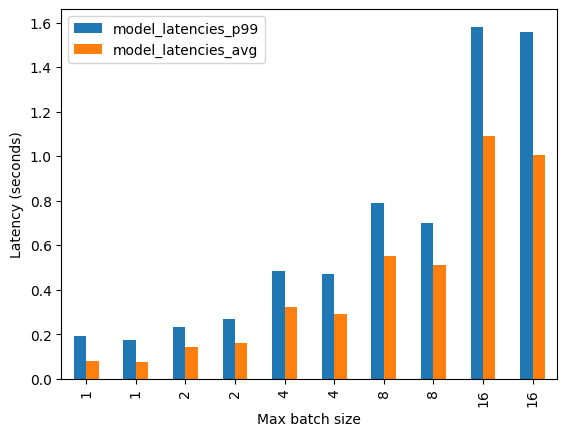

In [10]:
experiment_ids = key_config_df[
    key_config_df['model_variant'] == 'resnet18']['experiment_id'].tolist()
metadata_columns = ['model_variant', 'max_batch_size']
results_columns = ['model_latencies_p99', 'cpu_usage_count_avg', 'model_latencies_avg']
output = loader.table_maker(
    experiment_ids=experiment_ids,
    metadata_columns=metadata_columns,
    results_columns=results_columns)
display(output)
ax = output.plot.bar(x='max_batch_size', y=['model_latencies_p99', 'model_latencies_avg'])
ax.set_xlabel("Max batch size")
ax.set_ylabel("Latency (seconds)")

,model_variant,max_batch_size,model_latencies_p99,cpu_usage_count_avg,model_latencies_avg
0,resnet50,1,0.266413,543.314881,0.110404
1,resnet50,1,0.229184,2227.634486,0.105021
2,resnet50,2,0.313481,410.764654,0.173359
3,resnet50,2,0.352189,1692.248069,0.180013
4,resnet50,4,0.496780,415.284217,0.348686
5,resnet50,4,0.550330,1524.129070,0.364142
6,resnet50,8,0.874362,390.522119,0.643674
7,resnet50,8,0.965798,1494.870034,0.690472
8,resnet50,16,1.969377,468.580518,1.265904
9,resnet50,16,1.957153,1662.636559,1.281836


Text(0, 0.5, 'Latency (seconds)')

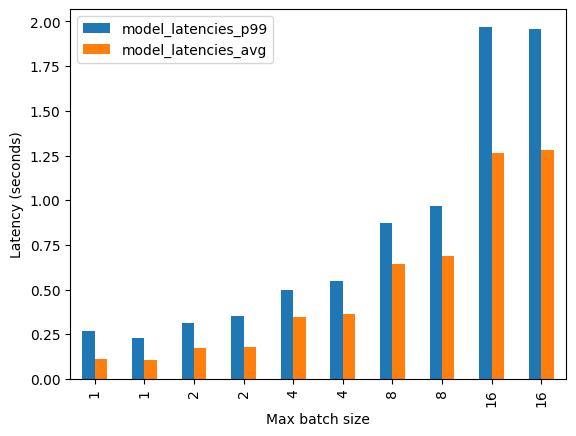

In [11]:
experiment_ids = key_config_df[
    key_config_df['model_variant'] == 'resnet50']['experiment_id'].tolist()
metadata_columns = ['model_variant', 'max_batch_size']
results_columns = ['model_latencies_p99', 'cpu_usage_count_avg', 'model_latencies_avg']
output = loader.table_maker(
    experiment_ids=experiment_ids,
    metadata_columns=metadata_columns,
    results_columns=results_columns)
display(output)
ax = output.plot.bar(x='max_batch_size', y=['model_latencies_p99', 'model_latencies_avg'])
ax.set_xlabel("Max batch size")
ax.set_ylabel("Latency (seconds)")

Text(0, 0.5, 'Latency (seconds)')

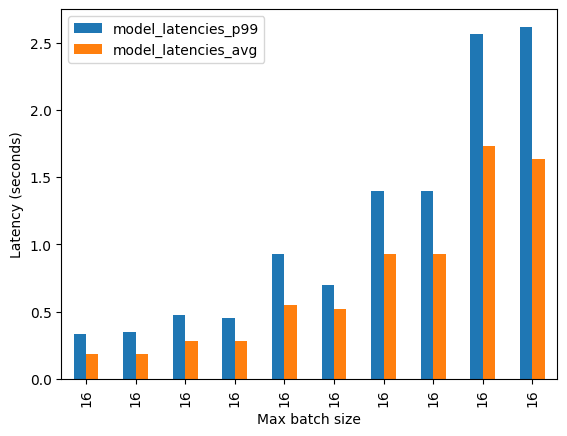

In [12]:
experiment_ids = key_config_df[
    key_config_df['model_variant'] == 'resnet152']['experiment_id'].tolist()
metadata_columns = ['model_variant', 'cpu_request', 'memory_request']
results_columns = ['model_latencies_p99', 'cpu_usage_count_avg', 'model_latencies_avg']
output = loader.table_maker(
    experiment_ids=experiment_ids,
    metadata_columns=metadata_columns,
    results_columns=results_columns)
ax = output.plot.bar(x='cpu_request', y=['model_latencies_p99', 'model_latencies_avg'])
ax.set_xlabel("Max batch size")
ax.set_ylabel("Latency (seconds)")

,model_variant,cpu_request,memory_request,model_latencies_p99,cpu_usage_count_avg,model_latencies_avg
0,resnet18,16,60Gi,0.231545,242.980053,0.143327
1,resnet18,16,60Gi,0.271106,1096.512540,0.159352
2,resnet50,16,60Gi,0.313481,410.764654,0.173359
3,resnet50,16,60Gi,0.352189,1692.248069,0.180013
4,resnet152,16,60Gi,0.472719,963.897738,0.280235
5,resnet152,16,60Gi,0.453809,3250.044109,0.280464


Text(0, 0.5, 'Latency (seconds)')

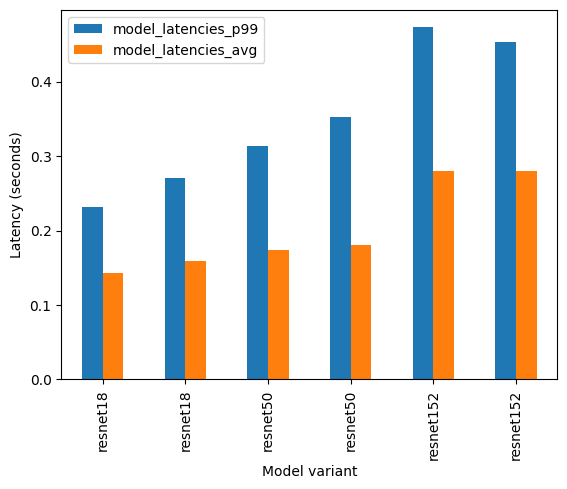

In [13]:
experiment_ids = key_config_df[
    key_config_df['max_batch_size'] == 2]['experiment_id'].tolist()
metadata_columns = ['model_variant', 'cpu_request', 'memory_request']
results_columns = ['model_latencies_p99', 'cpu_usage_count_avg', 'model_latencies_avg']
output = loader.table_maker(
    experiment_ids=experiment_ids,
    metadata_columns=metadata_columns,
    results_columns=results_columns)
display(output)
ax = output.plot.bar(x='model_variant', y=['model_latencies_p99', 'model_latencies_avg'])
ax.set_xlabel("Model variant")
ax.set_ylabel("Latency (seconds)")